Ahyar


 Bergabung sejak 03 Jun 2020

 Kota Bandung, Jawa Barat

In [16]:
import pandas as pd
df = pd.read_csv('/kaggle_movie_train.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [18]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [19]:
df['genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [20]:

df['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [21]:
# menghapus 4 genre
df = df[~df['genre'].isin(['drama','comedy','other','adventure','horror'])]
df['genre'].value_counts()

thriller    6824
action      2392
sci-fi       613
romance       63
Name: genre, dtype: int64

In [22]:
# mempertahankan kolom yang penting
df=df[["text","genre"]]
df.head()


,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
5,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,uilding. A MAN in pajamas runs out into the ra...,thriller
8,"Memphis goes back into the garage, Budgy cack...",thriller


In [23]:
#  one-hot-encoding dan membuat dataframe baru
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru

,text,action,romance,sci-fi,thriller
0,"eady dead, maybe even wishing he was. INT. 2ND...",0,0,0,1
3,ded by the two detectives. INT. JEFF'S APARTME...,0,0,0,1
5,breadth of the bluff. Gabe pulls out his ancie...,0,0,0,1
6,uilding. A MAN in pajamas runs out into the ra...,0,0,0,1
8,"Memphis goes back into the garage, Budgy cack...",0,0,0,1
...,...,...,...,...,...
22569,d Cricket running down road. DISSOLVE TO 53. E...,0,0,1,0
22570,"BATHROOM DAY Brushing his teeth, staring accus...",0,0,0,1
22572,HER and TWO COOKS are standing in a row waitin...,0,0,0,1
22576,"OTTIE You've got a thing about Ernie's, haven'...",0,0,0,1


In [25]:
# mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array 
text = df_baru['text'].values
label = df_baru[['action', 'romance', 'sci-fi', 'thriller']].values

In [54]:
# membagi data untuk training dan data untuk testing
from sklearn.model_selection import train_test_split
tweet_latih, tweet_test, label_latih, label_test = train_test_split(tweet, label, shuffle=True, test_size=0.2)

In [55]:
# mengubah setiap kata ke dalam bilangan numerik dan konversi menjadi sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tweet_latih) 
tokenizer.fit_on_texts(tweet_test)
 
sekuens_latih = tokenizer.texts_to_sequences(tweet_latih)
sekuens_test = tokenizer.texts_to_sequences(tweet_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [56]:
# membuat layer embedding
import tensorflow as tf
from keras import regularizers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
#fungsi call back

class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.92 ): 

      print("\nAkurasi telah mencapai >90%!")

      self.model.stop_training = True

callbacks = myCallback()

In [63]:
# melatih model
num_epochs = 30
history = model.fit(padded_latih, label_latih, batch_size=64, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, 
                    callbacks=[callbacks])

Epoch 1/30
124/124 - 19s - loss: 0.0202 - accuracy: 0.9944 - val_loss: 0.7591 - val_accuracy: 0.8681
Epoch 2/30
124/124 - 19s - loss: 0.0580 - accuracy: 0.9853 - val_loss: 0.4558 - val_accuracy: 0.9106
Epoch 3/30
124/124 - 19s - loss: 0.1290 - accuracy: 0.9623 - val_loss: 0.4692 - val_accuracy: 0.9131
Epoch 4/30
124/124 - 19s - loss: 0.0429 - accuracy: 0.9889 - val_loss: 0.3947 - val_accuracy: 0.9186
Epoch 5/30
124/124 - 19s - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.4054 - val_accuracy: 0.9242

Akurasi telah mencapai >90%!


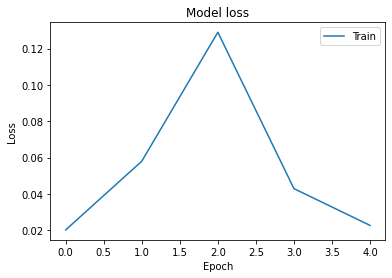

In [64]:
# membuat model loss
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

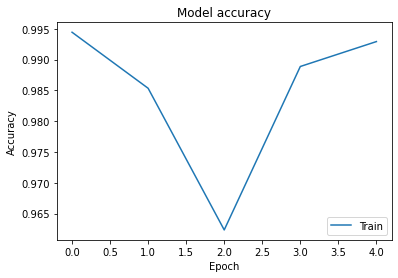

In [65]:
# membuat model accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

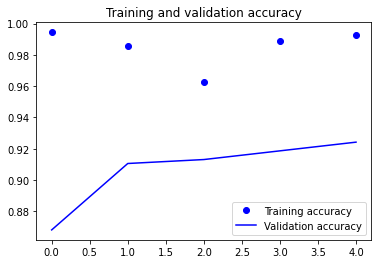

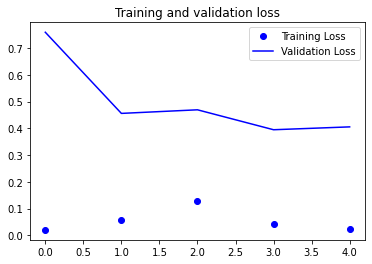

In [66]:
# membuat plot training vs validasi accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()